In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
from matplotlib.colors import LogNorm

In [24]:
marks_1_test = np.array([1,2,3,4, 3,4 ,2,2,1,2,1])#np.array([1,2,2,0,1,2,0,0,0,2,2,1,1,2,2,1,0,0,0,0,0,0,0,2,0])
N = 3# window size
#first, assign each bead with a new value, the average of all beads (N-1)/2 to the left and right
mark_profile = marks_1_test
kernel = np.ones(N)/(N-1)
kernel[N//2] = 0
avgd_prof = np.convolve(mark_profile, kernel, mode='same')
avgd_prof

array([1. , 2. , 3. , 3. , 4. , 2.5, 3. , 1.5, 2. , 1. , 1. ])

In [3]:
marks_1_test = np.array([1,2,3,4, 3,4 ,2,2,1,2,1])#np.array([1,2,2,0,1,2,0,0,0,2,2,1,1,2,2,1,0,0,0,0,0,0,0,2,0])

N = 101# window size

marks_1 = np.loadtxt(r"H3K9me3_ENCFF651ZTT_Chr_22_trimmed.txt").astype(np.uint8)
marks_2 = np.loadtxt(r"H3K27me3_ENCFF470ECE_Chr_22_trimmed.txt").astype(np.uint8)
#first, assign each bead with a new value, the average of all beads (N-1)/2 to the left and right
mark_profile = marks_1

kernel = np.ones(N)/(N-1)
kernel[N//2] = 0

# avgd_prof = np.convolve(mark_profile, np.ones(N)/N, mode='same') # average INCLUDING center bead
avgd_prof = np.convolve(mark_profile, kernel, mode='same') # average EXCLUDING center bead


In [4]:
len(marks_1[marks_1 ==0])

119524

In [22]:
len(marks_1[marks_1 ==1])

14282

In [23]:
len(marks_1[marks_1 ==2])

120096

In [5]:
len(np.where(avgd_prof<0.53)[0])

79066

In [6]:
euc = avgd_prof[avgd_prof<0.53]
inter = avgd_prof[(avgd_prof>=0.53) & (avgd_prof<=0.705)]
het = avgd_prof[avgd_prof>0.705]

In [7]:
len(euc)

79066

In [8]:
np.mean(euc)

0.030000505906457895

In [9]:
len(het)

168438

In [10]:
np.mean(het)

1.4727870195561568

In [17]:
# calculate average methylation for each "bucket", and define new profiel accordingly
# not how the values of the average show that there are methylated nucleosomes in euchromatic region, 
#     and unmehtylated nucleosomes in the heterochromatic region!

In [11]:
disc_mark_prof = np.zeros(len(avgd_prof))
disc_mark_prof[avgd_prof<0.53] = np.mean(euc)
disc_mark_prof[(avgd_prof>=0.53) & (avgd_prof<=0.705)] = np.mean(inter)
disc_mark_prof[avgd_prof>0.705] = np.mean(het)

In [37]:
def consecutive_subarrays(arr):
    # Sort the array
    arr = np.sort(arr)
    
    # Initialize list to store subarrays
    subarrays = []
    
    # Initialize variables for subarray construction
    start = arr[0]
    end = arr[0]
    
    # Iterate through the sorted array
    for i in range(1, len(arr)):
        # Check if the current number is consecutive to the previous one
        if arr[i] == end + 1:
            end = arr[i]  # Expand the subarray
        else:
            # If not consecutive, add the current subarray to the list and start a new one
            subarrays.append(list(range(start, end + 1)))
            start = arr[i]
            end = arr[i]
    
    # Add the last subarray
    subarrays.append(list(range(start, end + 1)))
    lengths = [len(subarray) for subarray in subarrays]    
    return subarrays,lengths

In [18]:
# find length distribution of each region type. How long are regions where avg<0.53, > .705, etc

In [47]:
np.unique(disc_mark_prof)

array([0.03000051, 0.62925133, 1.47278702])

[     0      1      2 ... 253899 253900 253901]
[52796, 24, 2, 14, 64, 650, 213, 662, 6, 8, 16, 4, 206, 217, 739, 1, 236, 21, 2, 2, 205, 93, 2, 1, 1, 73, 9, 11, 5, 223, 204, 202, 265, 11664, 4, 3, 602, 4, 11, 7, 17, 1, 107, 10, 12, 14, 28, 1, 6, 1, 9, 2, 2, 171, 50, 106, 491, 1, 184, 3949, 3, 66, 144, 2, 1, 1, 31, 5, 164, 1, 44, 96, 28, 2, 2, 8, 90, 121, 1, 1, 21, 2206, 33, 83, 33, 3, 2, 77, 260, 66, 138, 45, 3, 25, 4, 15, 4, 3, 20, 2, 2, 32, 1, 2, 9, 2, 3, 3, 4, 1, 95, 2, 7, 38, 3, 2, 7, 1, 82, 68, 1, 3, 3, 46, 8, 3, 2, 1, 1, 34, 6, 18, 24, 64]


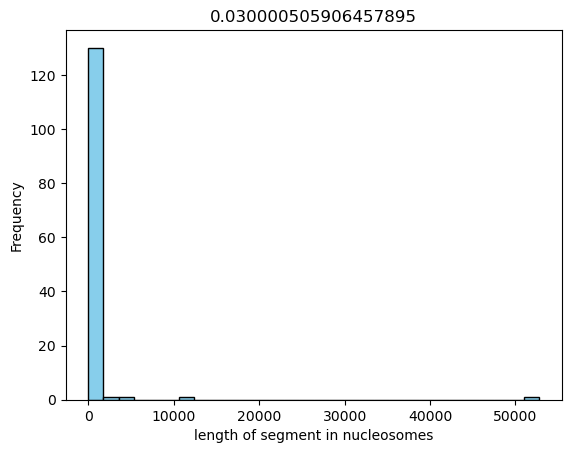

[ 52796  52797  52798 ... 253835 253836 253837]
[19, 3, 59, 3, 8, 13, 2, 2, 3, 2, 18, 31, 4, 4, 10, 9, 9, 9, 9, 9, 12, 3, 12, 57, 6, 32, 3, 1, 33, 2, 2, 19, 11, 5, 2, 10, 9, 9, 25, 30, 3, 2, 83, 2, 20, 6, 10, 9, 13, 1, 17, 2, 44, 2, 8, 7, 1, 10, 17, 3, 13, 23, 9, 9, 9, 9, 25, 22, 18, 1, 30, 2, 4, 30, 4, 2, 35, 22, 6, 4, 1, 42, 2, 1, 1, 14, 8, 18, 1, 35, 42, 4, 1, 142, 33, 11, 1, 39, 2, 2, 8, 2, 19, 3, 39, 1, 25, 2, 5, 13, 4, 14, 6, 3, 40, 3, 12, 38, 43, 2, 36, 53, 4, 4, 36, 2, 23, 30, 34, 4, 43, 43, 5, 9, 4, 16, 35, 17, 31, 15, 9, 12, 10, 4, 13, 15, 1, 13, 35, 4, 38, 10, 14, 1, 10, 3, 2, 1, 20, 17, 2, 26, 10, 11, 89, 1, 14, 3, 7, 34, 2, 9, 44, 25, 1, 15, 54, 2, 4, 1, 2, 21, 29, 1, 54, 1, 2, 2, 9, 13, 29, 1, 2, 76, 2, 8, 2, 1, 90, 1, 5, 1, 1, 14, 27, 2, 25, 2, 3, 11, 8, 32, 2, 3, 15, 10, 19, 23, 44, 1, 4, 2, 2, 5, 1, 1, 5, 4, 27, 8, 2, 44, 2, 2, 13, 3, 27, 11, 9, 1, 25, 1, 4, 9, 19, 2, 51, 4, 13, 15, 52, 11, 2, 53, 31, 2, 13, 4, 11, 25, 1, 1, 1, 2, 39, 1, 13, 2, 4, 2, 1, 17, 1, 1, 4, 51

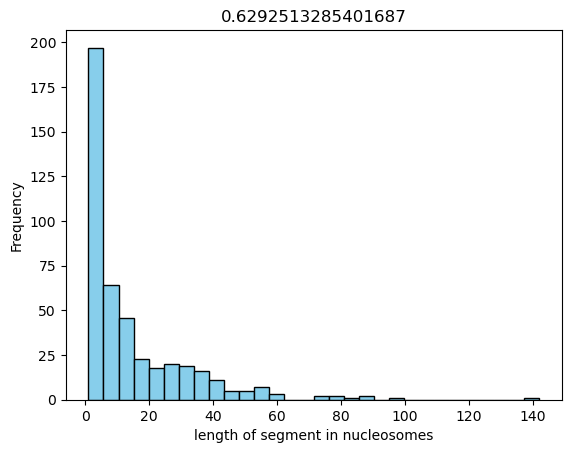

[ 52815  52816  52817 ... 253822 253823 253824]
[46, 6, 3, 2, 5, 2, 22, 4, 111, 1, 656, 241, 281, 88, 7, 8, 3, 1, 23, 538, 131, 1, 215, 450, 213, 1, 332, 188, 2, 173, 2, 321, 821, 793, 161, 172, 5, 1, 6, 194, 19, 253, 14, 9, 5, 3, 28, 1, 68, 2, 9, 10, 156, 12, 1, 56, 1, 4, 4, 4, 71, 6, 144, 4, 1, 182, 1, 2, 3, 2, 2, 1, 175, 1, 8, 3, 11, 3, 2, 120, 2, 260, 8, 10, 1322, 484, 1877, 2, 7, 1935, 4339, 1, 251, 3395, 3, 32, 17, 1, 200, 355, 1, 333, 2, 2, 2, 693, 5, 12, 164, 113, 3, 3, 1, 97, 2, 2, 1185, 3, 348, 1178, 4, 235, 1, 4, 99, 1, 10, 4, 278, 2011, 11, 1, 1585, 17, 1614, 1217, 1, 6, 1, 966, 8, 6, 5, 1, 11, 7, 951, 2, 238, 6, 488, 1, 8, 1, 10, 2153, 892, 4, 10, 278, 1630, 31, 3, 1, 22723, 5, 586, 1, 2, 362, 5, 2, 1403, 2618, 6, 589, 1, 2, 2439, 1, 3, 1225, 1, 2405, 1, 18619, 7317, 2, 4, 1185, 122, 1088, 3, 3, 22, 2, 68, 10, 8, 1, 1, 11, 64, 6, 1117, 1622, 17, 8, 451, 153, 1, 14, 4, 4124, 350, 3, 201, 20, 4653, 7736, 1975, 1, 15, 2, 753, 767, 4, 1, 5, 196, 27, 3, 1, 1, 20, 297, 351, 2687

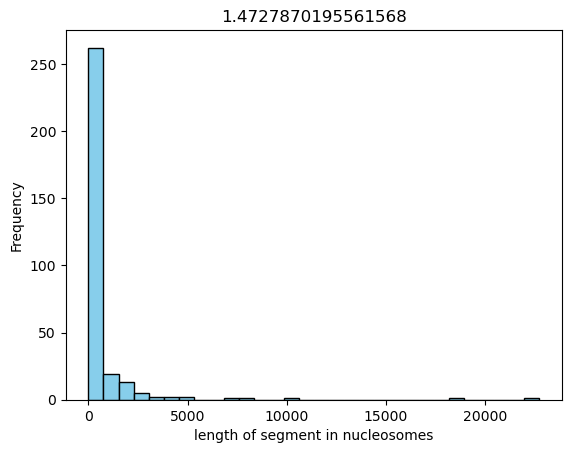

In [45]:
subs_arr = np.zeros(3, dtype = object)
for i,val in enumerate(np.unique(disc_mark_prof)):
#     print(np.where(disc_mark_prof == val)[0])
    subs, lens = consecutive_subarrays(np.where(disc_mark_prof == val)[0])
#     print(lens)
    subs_arr[i] = subs
    # Plotting a basic histogram
    plt.hist(lens, bins=30, color='skyblue', edgecolor='black')

    # Adding labels and title
    plt.xlabel('length of segment in nucleosomes')
    plt.ylabel('Frequency')
    plt.title(str(val))

    # Display the plot
    plt.show()

<Figure size 640x480 with 0 Axes>

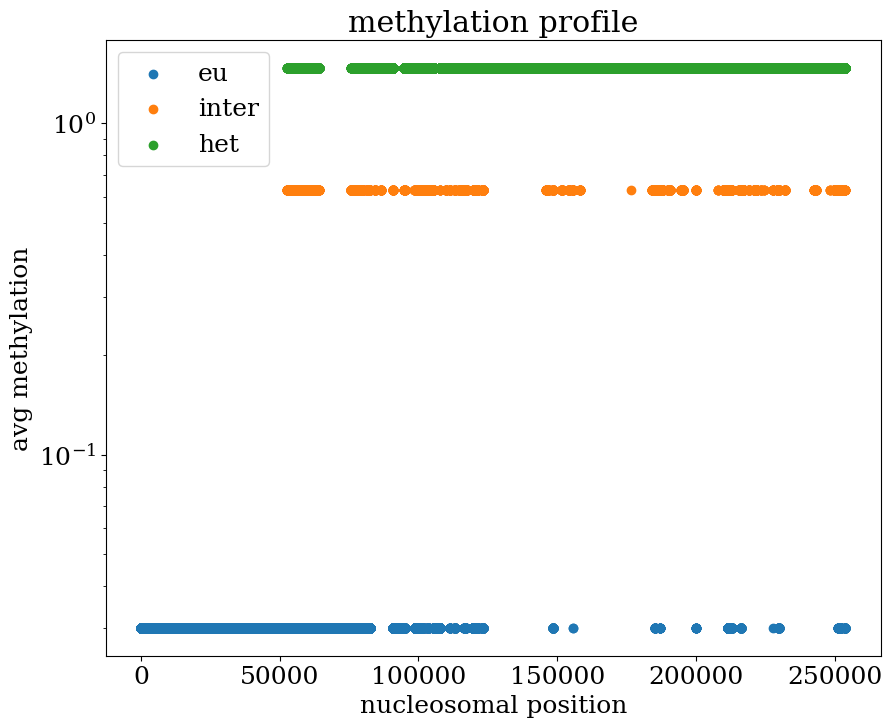

In [97]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.yscale("log")  

euc_loci = np.concatenate(subs_arr[0])

plt.scatter(euc_loci, np.ones(len(euc_loci))*np.mean(euc), label = "eu")
inter_loci = np.concatenate(subs_arr[1])
plt.scatter(inter_loci, np.ones(len(inter_loci))*np.mean(inter), label = "inter")
het_loci = np.concatenate(subs_arr[2])
plt.scatter(het_loci, np.ones(len(het_loci))*np.mean(het), label= "het")
    # Adding labels and title
plt.xlabel('nucleosomal position')
plt.ylabel('avg methylation')
plt.title("methylation profile")
plt.legend()

In [ ]:
# proof of no overlap in previous plot

In [57]:
len(marks_1)

253902

In [59]:
len(np.concatenate(subs_arr[0])) + len(np.concatenate(subs_arr[1])) + len(np.concatenate(subs_arr[2]))

253902

In [61]:
np.intersect1d(np.concatenate(subs_arr[0]),np.concatenate(subs_arr[1]) )

array([], dtype=int32)

In [62]:
np.intersect1d(np.concatenate(subs_arr[1]),np.concatenate(subs_arr[2]) )

array([], dtype=int32)

In [63]:
np.intersect1d(np.concatenate(subs_arr[0]),np.concatenate(subs_arr[2]) )

array([], dtype=int32)

In [ ]:
# how correlated are regions? 
# turn each phase type into array of 0s and 1s, then do <sig_i^P sig_j^P>

In [76]:
euc_sigma = np.zeros(len(marks_1))
euc_sigma[euc_loci] = 1

inter_sigma = np.zeros(len(marks_1))
inter_sigma[inter_loci] = 1

het_sigma = np.zeros(len(marks_1))
het_sigma[het_loci] = 1

In [81]:
np.sum(euc_sigma+inter_sigma+het_sigma == np.ones(len(marks_1))) / len(marks_1)

1.0

In [82]:
from scipy import signal

def mark_corr_eval(poly_marks): 
    # defining avg
#     [n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu, f_om, N, N_m, b] = chrom
    [marks_1, marks_2] = poly_marks

    s_bnd_A = marks_1#s_bnd[np.array(poly_marks[gam1_ind])+3*gam1_ind]
    s_bnd_B = marks_2#s_bnd[np.array(poly_marks[gam2_ind])+3*gam2_ind]
    
    M = len(marks_1)
    sisj_tens = np.zeros(M)
    
    sisj_tens[0] = np.sum(s_bnd_A * s_bnd_B)
#     conv = np.convolve(s_bnd_A, s_bnd_B[::-1])
    conv = signal.convolve(s_bnd_A, s_bnd_B[::-1])
#     print("convol")
#     print(conv)
    sisj_tens[1:] = (conv[:M-1][::-1] + conv[:M-1:-1][::-1]) 
#     print("result")
#     print(sisj_tens)
    res = np.zeros(M)
    res[0] = M
    res[1:] = np.arange(2, 2*(M), 2)[::-1]
#     print(res)
    
    return sisj_tens/ res

<Figure size 640x480 with 0 Axes>

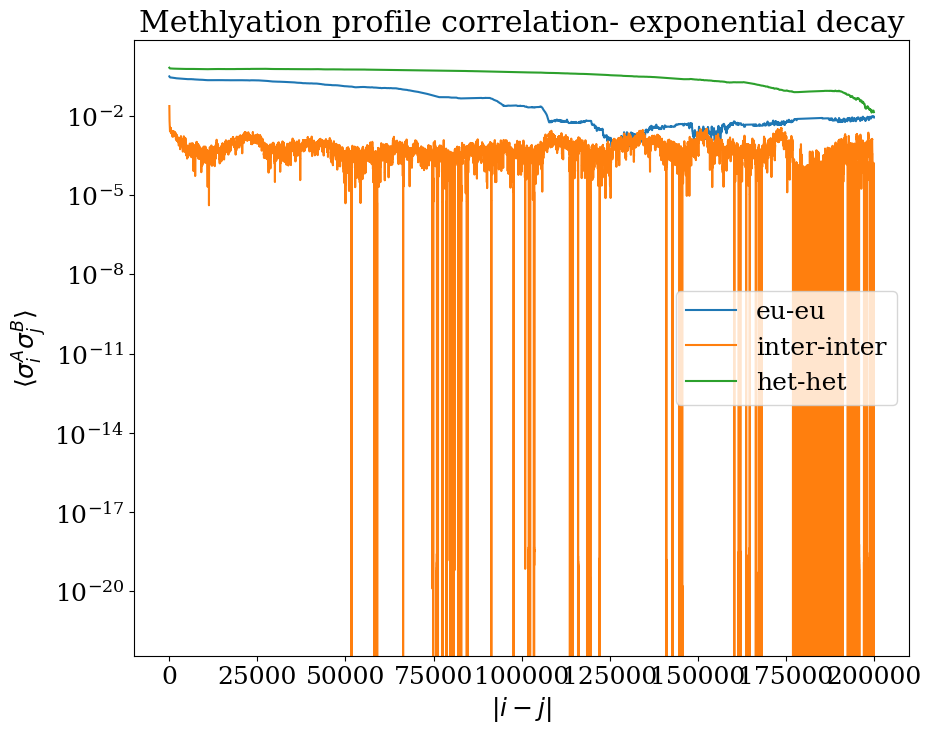

In [105]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.yscale("log")   

x_range = 100
x_range = 200000

poly_marks = [euc_sigma, euc_sigma]
corr = mark_corr_eval(poly_marks)[1:x_range]
plt.plot(np.arange(1, x_range), corr, label = r"eu-eu")

poly_marks = [inter_sigma, inter_sigma]
corr = mark_corr_eval(poly_marks)[1:x_range]
plt.plot(np.arange(1, x_range), corr, label = r"inter-inter")

poly_marks = [het_sigma, het_sigma]
corr = mark_corr_eval(poly_marks)[1:x_range]
plt.plot(np.arange(1, x_range), corr, label = r"het-het")

# poly_marks = [het_sigma, euc_sigma]
# corr = mark_corr_eval(poly_marks)[1:50]
# plt.plot(np.arange(1, 50), corr, label = r"het-euc")



plt.xlabel('$|i-j|$')
plt.ylabel(r'$\langle \sigma_i^{A} \sigma_j^{B} \rangle $')
plt.title("Methlyation profile correlation- exponential decay")
plt.legend()

<Figure size 640x480 with 0 Axes>

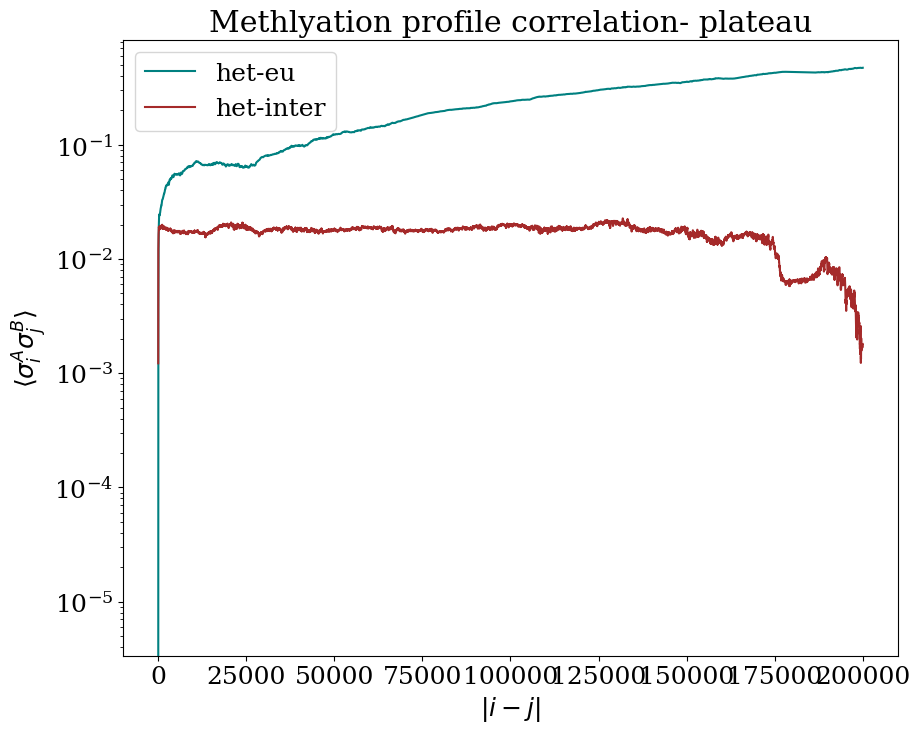

In [104]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.yscale("log")   

x_range = 200000

poly_marks = [het_sigma, euc_sigma]
corr = mark_corr_eval(poly_marks)[1:x_range]
plt.plot(np.arange(1, x_range), corr, color = "teal", label = r"het-eu")

poly_marks = [het_sigma, inter_sigma]
corr = mark_corr_eval(poly_marks)[1:x_range]
plt.plot(np.arange(1, x_range), corr, color = "brown", label = r"het-inter")

# poly_marks = [het_sigma, het_sigma]
# corr = mark_corr_eval(poly_marks)[1:x_range]
# plt.plot(np.arange(1, x_range), corr, label = r"het-het")




plt.xlabel('$|i-j|$')
plt.ylabel(r'$\langle \sigma_i^{A} \sigma_j^{B} \rangle $')
plt.title("Methlyation profile correlation- plateau")
plt.legend()

In [19]:
# create random copoly where in avg methylation = avg binding corresponding to region?? then do dens-dens analysis??

In [20]:
# from scipy.ndimage import uniform_filter1d
# N = 1000
# x = np.random.random(100000)
# y = uniform_filter1d(x, size=N)